In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import glob
from netCDF4 import Dataset
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

In [2]:
def makeavgmatrix(lats,lons,dset,footprintradio):
    
    #print 'data:'
    #print max(data['lat']), min(data['lat']), max(data['lon']), min(data['lon'])
    matrix=np.zeros((len(lons),len(lats)),dtype=np.float64)
    countermatrix=np.zeros((len(lons),len(lats)),dtype=int)
    stdmatrix=np.zeros((len(lons),len(lats)),dtype=np.float64)
    
    for ilat,latc in enumerate(lats):
        for ilon,lonc in enumerate(lons):
            ####################################################################
            distances2=np.array((dset['lat']-latc)**2+(dset['lon']-lonc)**2)
            conditions=(footprintradio**2 > distances2)
            #print(conditions)
            index=np.where(conditions)
            ######################################################################
            if len(index) > 0:
                vec=dset['psurfavg'][index]
                #print(vec)
                matrix[ilon,ilat]=np.average(vec)
                #print(matrix[ilon,ilat],ilon,ilat)
                stdmatrix[ilon,ilat]=np.std(vec)
                countermatrix[ilon,ilat]=len(vec)
            else:
                #print(matrix[ilon,ilat],ilon,ilat)
                pass
                #plt.plot(data['lon'],data['lat'],'b.')
                #plt.plot([lon],[lat],'ro')
                #plt.show()
                
    errmatrix=stdmatrix/np.sqrt(countermatrix)
    #print(matrix)
    return matrix.T,stdmatrix.T, errmatrix.T


In [27]:
nx=50
ny=50

latmin = 18.3
latmax = 20.5
lonmin = -100.5
lonmax = -97.7
footprintradio = 15.0/110.0

lats = latmin+(latmax-latmin)*np.arange(ny)/(ny-1)
lons = lonmin+(lonmax-lonmin)*np.arange(nx)/(nx-1)

In [28]:
dset = np.load('psurf_avg.npz', 'r')
matrix1,stdmat1,errmat1 = makeavgmatrix(lats,lons,dset,footprintradio)
dset.close()

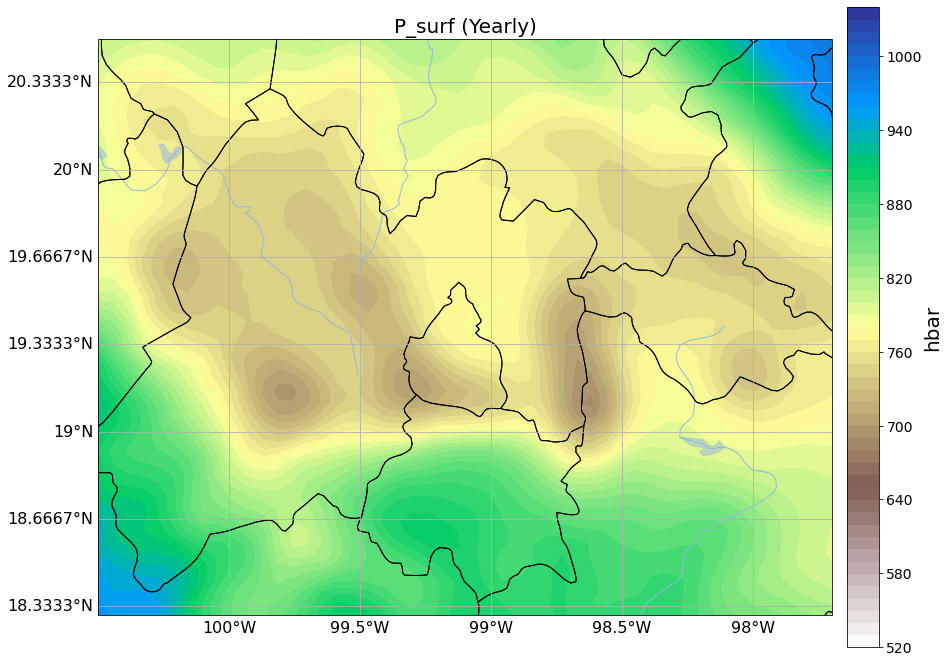

In [29]:
plt.figure(figsize=(14,14))
fontsize = 20
ticksize = 14
# Creates the map
mxmap = plt.axes(projection=ccrs.PlateCarree())

mxmap.add_feature(cfeature.LAND)
mxmap.add_feature(cfeature.OCEAN)
mxmap.add_feature(cfeature.COASTLINE)
mxmap.add_feature(cfeature.BORDERS, linestyle=':')
mxmap.add_feature(cfeature.LAKES, alpha=0.5)
mxmap.add_feature(cfeature.RIVERS)
mxmap.add_feature(cfeature.STATES.with_scale('10m'))
mxmap.set_extent((lonmin,lonmax,latmin,latmax))
#mxmap.xaxis.set_visible(True)
#mxmap.yaxis.set_visible(True)

glines = mxmap.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
glines.xformatter = LongitudeFormatter()
glines.yformatter = LatitudeFormatter()
glines.top_labels = None
glines.right_labels = None
glines.xlabel_style = {'size': 16}
glines.ylabel_style = {'size': 16}

lvls = np.arange(520,1050,10)
plt.contourf(lons, lats, matrix1, levels = lvls,cmap=plt.get_cmap("terrain_r"),
             transform=ccrs.PlateCarree())
plt.title("P_surf (Yearly)",size=fontsize)
plt.xlabel("Longitude",size=fontsize)
plt.ylabel("Latitude",size=fontsize)
cbar= plt.colorbar(fraction=0.041, pad=.02)
cbar.set_label("hbar", size=fontsize, labelpad=0.8)
cbar.ax.tick_params(labelsize=ticksize)
#plt.savefig('f:\\gitCCA\\cca-jupyter\\figures\\xco2_ml_feb-ago.png')
plt.show()

In [ ]:
######################################################

In [ ]:
######################################################

In [ ]:
######################################################

In [ ]:
######################################################
# A whole bunch of tests below
# These were done to understand masking with np.where and with fancy indexing (?)

In [72]:
latc=18.8
lonc=-100.3
distances2=np.array((dset['lat']-latc)**2+(dset['lon']-lonc)**2)
conditions=(footprintradio**2 > distances2)
index=np.where(conditions)
print(distances2.shape, distances2)
print(conditions.shape, conditions)
#print(index.shape, index)
print(dset['lat'][index],dset['lon'][index],dset['psurfavg'][index])
print(np.dstack((dset['lat'][index],dset['lon'][index],dset['psurfavg'][index])))


(89, 104) [[ 0.4112081   0.39344442  0.37730718 ...  6.8184395   6.96475
   7.1125293 ]
 [ 0.3820735   0.36432073  0.3481621  ...  6.7909374   6.9372525
   7.085046  ]
 [ 0.35444757  0.33667538  0.3205096  ...  6.7649136   6.9112334
   7.059181  ]
 ...
 [ 3.2567136   3.2388322   3.2225626  ...  9.806669    9.956019
  10.106828  ]
 [ 3.3537436   3.335754    3.319442   ...  9.905453   10.054729
  10.205681  ]
 [ 3.4520586   3.4341269   3.4178445  ... 10.005598   10.154909
  10.305813  ]]
(89, 104) [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[18.761444 18.761116 18.788803 18.788483 18.788155 18.815842 18.815521
 18.8152   18.84256 ] [-100.312225 -100.28366  -100.340454 -100.31189  -100.283325 -100.34009
 -100.31152  -100.28296  -100.31119 ] [926.41266 903.34515 933.46436 9

In [71]:
print(len(index[0]))
mat = psurfavg[index]
print(mat, np.average(mat))

9
[926.41266 903.34515 933.46436 927.88007 912.2608  918.0441  916.7936
 917.4095  876.59863] 914.6899


In [8]:
print(lat[index],lon[index])

[[18.764694 18.764427 18.76416  18.76387  18.76358  18.763306 18.763
  18.762703 18.762398 18.762077 18.761757 18.761444 18.761116 18.760796
  18.760452 18.760117 18.759773 18.759407 18.75904  18.758675 18.758293
  18.757912 18.757545 18.757164 18.756775 18.756363 18.755966 18.755554
  18.75515  18.75473  18.75431  18.75386  18.75344  18.75299  18.752556
  18.752083 18.75164  18.751183 18.75071  18.750244 18.749748 18.749283
  18.748787 18.748283 18.747795 18.747276 18.746773 18.746254 18.745735
  18.745209 18.744675 18.74414  18.743599 18.743034 18.742493 18.741936
  18.741364 18.740807 18.740227 18.739647 18.739052 18.738472 18.73787
  18.737267 18.736656 18.73603  18.735435 18.73481  18.734169 18.733536
  18.732918 18.732254 18.731606 18.73095  18.730293 18.729622 18.728935
  18.728271 18.727608 18.726898 18.726212 18.725517 18.724815 18.724098
  18.723373 18.722664 18.721924 18.721199 18.720467 18.719727 18.718979
  18.718216 18.71746  18.71669  18.715935 18.715157 18.714401 18.713

In [74]:
dset.close()

In [45]:
coords=np.dstack((lon,lat))
mask=(footprintradio**2 > ((coords[:,:,0]-lonc)**2+(coords[:,:,1]-latc)**2))
print(lonc,latc)
print(mask.shape,mask)
print(coords[mask].shape,coords[mask])

-100.3 18.8
(89, 104) [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(9, 2) [[-100.312225   18.761444]
 [-100.28366    18.761116]
 [-100.340454   18.788803]
 [-100.31189    18.788483]
 [-100.283325   18.788155]
 [-100.34009    18.815842]
 [-100.31152    18.815521]
 [-100.28296    18.8152  ]
 [-100.31119    18.84256 ]]


In [73]:
for ele in coords[mask]:
    k, l = np.where(coords[:,:,0]== ele[0])
    #print(k,l)
    #print(coords[k,l,:])
    #print(ele)
    print(psurfavg[k,l])

[926.41266]
[903.34515]
[933.46436]
[927.88007]
[912.2608]
[918.0441]
[916.7936]
[917.4095]
[876.59863]
